***1.1.1
 Please provide definiton of Hinge Loss Function with the offset $\theta_0$***


Hinge loss: 

$Loss_h(z) = max{1- y (\theta^Tx), 0}$

Hinge loss with offset $\theta_0$: 

$Loss_h(z) = max{1- y (\theta^T x + \theta_0), 0}$

***1.1.2 Describe how to update weights $\theta$ and $\theta_0$ to minimize the hinge loss function using stochastic sub-gradient descent***


Stochastic Gradient Descent (SGD) is an optimization method used to minimize a loss funciton like the hinge loss function by updating parameters using randomly selected data points. For hinge loss, the goal is to maximize the margin between data points and the decision boundary.

Hinge loss can be calculated as: $Loss_h(z) = max{1- y (\theta^Tx), 0}$. If $yt(\theta \cdot  x_t) >= 1$ the point is correctly classified and the loss is 0. However if $yt(\theta \cdot  x_t) < 1$ the point is either within the margin or misclassified, and hence the loss is positive. 

To optimize the classifier, we can compute the gradient of hinge loss with respect to \theta. If $yt(\theta \cdot  x_t) >= 1$, then no update is needed. If $yt(\theta \cdot  x_t) < 1$ then the weight vector must be updated in the direction of correction.

SGD updates the weight vector $\theta$ for each randomly selected sample $(xt, yt)$: 
$\theta^{(k + 1)} = \theta^{(k)} - \eta_k\nabla\theta Loss$

In SGD, $\theta$ is initialized as 0. Then a random traning example is seleted and the hinge loss is calculated. If $yt(\theta \cdot  x_t) >= 1$, then no update is needed. If $yt(\theta \cdot  x_t) < 1$ then we compute the gradient of the hinge loss: $\nabla_\theta Loss = -ytxt$. This tells us the direction in which we need to adjust $\theta$. $\theta = \theta - \eta_k(-ytxt)$ therefore $\theta = \theta + \eta_k ytxt$. Where $\eta_k$ is the learning rate. This is repeated until the max number of iterations is reached.



In [27]:
import numpy as np


In [28]:
def SGD(X, y, loss_gradient, lr = 0.01, max_iter = 100): 
    """
    Stochastic Gradient Descent

    X: numpy array of shape (n_samples, n_features) - features 
    y: numpy array of shape (n_samples,) - target values
    loss_gradient: function that computes the gradient of the loss function
    lr: learning rate
    max_iter: number of iterations

    
    """
    n_samples, n_features = X.shape
    theta = np.zeros(n_features) # initialze theta to 0 

    for k in range(max_iter):
        t = np.random.randing(n_samples)
        grad = loss_gradient(X[t], y[t], theta)
        theta -= lr * grad 
    
    return theta

In [29]:
def hinge_loss_gradient(x_t, y_t, theta):
    if y_t * np.dot(x_t, theta) < 1:
        return -y_t * x_t

    return np.zeros_like(theta)


***1.2.1 Implement the Perceptron Algorithm of Linear Classification with offset***

In [30]:
import numpy as np

def perceptron_with_offset(theta, offset, feature, target, num_features, max_iter=100):
    it = 0
    while it <= max_iter:
        misclassified = 0  
        for i in range(len(target)):
            if target[i] * (np.dot(theta, feature[i]) + offset) <= 0:
                theta = theta + feature[i] * target[i]
                offset = offset + target[i]
                misclassified += 1
                it += 1
        err = misclassified / len(target)
        if misclassified == 0:
            break

        ls = [theta, offset, err]

    return ls


***1.2.2 Train Linear Classifier with offset using Perceptron Algorithm and Evaluate***

In [31]:
import pandas as pd

In [32]:
training_data = pd.read_csv('data/hw1_train_1_5.csv')


In [33]:
X = training_data.iloc[:, :2].to_numpy()
y = training_data.iloc[:, 2].values

num_features = X.shape[1]
num_epochs = 1



In [34]:
theta = np.random.randn(num_features) * 0.01 
offset = 0.0
error = 0
num_epochs = 1

for i in range(num_epochs): 
    ls = perceptron_with_offset(theta, offset, X, y, num_features)
    theta = ls[0]
    offset = ls[1]
    err = ls[2]
    
    
print('learned weightd:', theta)
print('learned bias:', offset)
print('training error:', error)

learned weightd: [-2.61754871 -7.22670896]
learned bias: 0.0
training error: 0


In [35]:
theta = np.random.randn(num_features) * 0.01 
offset = 0.0
num_epochs = 5

for i in range(num_epochs): 
    ls = perceptron_with_offset(theta, offset, X, y, num_features)
    theta = ls[0]
    offset = ls[1]
    err = ls[2]
    
print('theta:', theta)
print('offset:', offset)
print('training error:', error)

theta: [-2.12474529 -9.09184819]
offset: 1.0
training error: 0


In [36]:
testing_data = pd.read_csv('data/hw1_test_1_5.csv')

In [37]:
X = testing_data.iloc[:, :2].to_numpy()
y = testing_data.iloc[:, 2].values

num_features = X.shape[1]
num_epochs = 5


In [38]:
theta = np.random.randn(num_features) * 0.01 
offset = 0.0
error = 0
num_epochs = 5

for i in range(num_epochs): 
    ls = perceptron_with_offset(theta, offset, X, y, num_features)
    theta = ls[0]
    offset = ls[1]
    err = ls[2]
    
    
print('learned weightd:', theta)
print('learned bias:', offset)
print('training error:', error)

learned weightd: [ 1.3092297  -7.86167801]
learned bias: 0.0
training error: 0


In [39]:
def compute_accuracy(theta, offset, X_test, y_test):
    predictions = np.sign(np.dot(X_test, theta) + offset)
    correct = np.sum(predictions == y_test)  
    accuracy = correct / len(y_test) 
    return accuracy

test_accuracy = compute_accuracy(theta, offset, X, y)

print('Learned weights:', theta)
print('Learned bias:', offset)
print('Training error:', err)
print('Test Accuracy:', test_accuracy)


Learned weights: [ 1.3092297  -7.86167801]
Learned bias: 0.0
Training error: 0.007992007992007992
Test Accuracy: 0.3546453546453546


In [40]:
import numpy as np

def stochastic_subgradient_descent(X, y, num_features, learning_rate=0.1, max_iter=1000):
    theta = np.random.randn(num_features) * 0.01 
    offset = 0.0  

    for it in range(max_iter):
        i = np.random.randint(0, len(y))  
        x_i, y_i = X[i], y[i] 

        if y_i * (np.dot(theta, x_i) + offset) < 1:
            theta = theta + learning_rate * (y_i * x_i)
            offset = offset + learning_rate * y_i

    return theta, offset


In [41]:
def compute_accuracy(theta, offset, X_test, y_test):

    predictions = np.sign(np.dot(X_test, theta) + offset)
    correct = np.sum(predictions == y_test)
    return correct / len(y_test)

def compute_training_error(theta, offset, X_train, y_train):
    predictions = np.sign(np.dot(X_train, theta) + offset)
    misclassified = np.sum(predictions != y_train)
    return misclassified / len(y_train)





In [43]:
X_train = training_data.iloc[:, :2].to_numpy()
y_train = training_data.iloc[:, 2].values
X_test = testing_data.iloc[:, :2].to_numpy() 
y_test = testing_data.iloc[:, 2].values



In [44]:
num_features = X_train.shape[1]
theta, offset = stochastic_subgradient_descent(X_train, y_train, num_features, learning_rate=0.1, max_iter=5000)
train_error = compute_training_error(theta, offset, X_train, y_train)
test_accuracy = compute_accuracy(theta, offset, X_test, y_test)

print(f"Learned Weights (theta): {theta}")
print(f"Learned Bias (offset): {offset}")
print(f"Training Error: {train_error:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Learned Weights (theta): [-3.87220647 -9.5188931 ]
Learned Bias (offset): 0.30000000000000004
Training Error: 0.0305
Test Accuracy: 96.30%


***1.2.5 What are your observations of the differeneces between the perceptron Algorithm using 5 epochs and the SSGD using 5000***

Even though the SSGD used a larger number of epochs, the computation was faser and more accurate than the perceptron algorithm.

The **Least Squares Criterion** for linear regression is given by:

$
J(\theta, b) = \frac{1}{2N} \sum_{i=1}^{N} \left( y_i - (\theta^T x_i + b) \right)^2
$

where:
- $N$ is the number of training examples,
- $x_i$ is the feature vector for the \( i \)-th sample,
- $y_i$ is the target output,
- $\theta$ is the weight vector,
- $b$ is the bias (offset).

To simplify notation, we **augment the input feature vector** by adding a 1 to each sample:

$
\tilde{x}_i = \begin{bmatrix} x_i \\ 1 \end{bmatrix}, \quad \tilde{\theta} = \begin{bmatrix} \theta \\ b \end{bmatrix}
$

This transforms our equation into:

$
J(\tilde{\theta}) = \frac{1}{2N} \sum_{i=1}^{N} \left( y_i - \tilde{\theta}^T \tilde{x}_i \right)^2
$

---

The optimal solution for **Least Squares Regression** can be computed in closed form as:

$\tilde{\theta} = (X^T X)^{-1} X^T y$

where:
$X$ is the augmented **design matrix** including the bias term,
-$y$ is the target vector.


---
Instead of using the closed-form solution, we can minimize the cost function using **Stochastic Gradient Descent (SGD)**:

1. Initialize $( \tilde{\theta} )$ randomly.
2. For each training sample $(x_i, y_i)$ :
   - Compute the prediction:

     $
     \hat{y}_i = \tilde{\theta}^T \tilde{x}_i
     $

   - Compute the gradient:

     $
     \nabla_{\tilde{\theta}} J = - (y_i - \hat{y}_i) \tilde{x}_i
     $

   - Update weights:

     $
     \tilde{\theta} = \tilde{\theta} - \eta \nabla_{\tilde{\theta}} J
     $

where $\eta$ is the **learning rate**.



In [45]:
import matplotlib.pyplot as plt

In [46]:
def closed_form_linear_regression(X, y):
    X_augmented = np.c_[X, np.ones(X.shape[0])]  
    theta_opt = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y

    theta = theta_opt[:-1]  
    offset = theta_opt[-1] 

    return theta, offset

def compute_training_error(X, y, theta, offset):

    y_pred = X @ theta + offset
    mse = np.mean((y - y_pred) ** 2)
    return mse

def plot_regression_line(X, y, theta, offset):

    plt.scatter(X, y, color='blue', label="Data Points")  
    x_range = np.linspace(min(X), max(X), 100)
    y_range = theta * x_range + offset
    plt.plot(x_range, y_range, color='red', label="Regression Line")

    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.show()



In [60]:
import numpy as np

def load_data(file_path):
    """
    Loads a single-column data file and returns it as a NumPy array.
    """
    return np.loadtxt(file_path)

# Load training and test sets (each file has one column)
X = load_data("data/hw1_linear_x.dat").reshape(-1, 1)  # Reshape to (n_samples, 1)
y = load_data("data/hw1_linear_y.dat").reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (200, 1)
Shape of y: (200, 1)


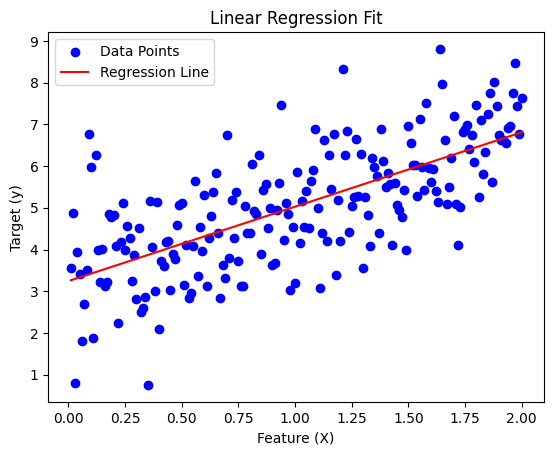

Optimal Weights (theta): [[1.78157138]]
Optimal Bias (offset): [3.2447227]
Training Error (Empirical Risk - MSE): 1.1625


In [63]:
theta, offset = closed_form_linear_regression(X, y)
train_error = compute_training_error(X, y, theta, offset)

plot_regression_line(X, y, theta, offset)

print(f"Optimal Weights (theta): {theta}")
print(f"Optimal Bias (offset): {offset}")
print(f"Training Error (Empirical Risk - MSE): {train_error:.4f}")

In [67]:
def gd_linear_regression(X, y, learning_rate=0.01, max_iters=100, update_intervals=5):

    X_bias = np.c_[np.ones(X.shape[0]), X]
    theta = np.random.randn(X_bias.shape[1], 1)
    
    update_step = max_iters // update_intervals  

    for iter in range(max_iters):
        for i in range(X_bias.shape[0]):
            prediction = X_bias[i] @ theta
            gradient = X_bias[i:i+1].T @ (prediction - y[i:i+1])
            theta -= learning_rate * gradient

        if iter % update_step == 0:
            print(f"Iteration: {iter}, Learning Rate: {learning_rate}, Theta: {theta.flatten()}")
            learning_rate *= 0.5 
    
    return theta
    


Iteration: 100, Learning Rate: 0.010000, Theta: [θ0=2.3341, θ1=2.0190], Training Error: 1.649627
Iteration: 200, Learning Rate: 0.005000, Theta: [θ0=2.5563, θ1=2.1859], Training Error: 1.297580
Iteration: 300, Learning Rate: 0.002500, Theta: [θ0=2.6155, θ1=2.2105], Training Error: 1.263303
Iteration: 400, Learning Rate: 0.001250, Theta: [θ0=2.6385, θ1=2.2156], Training Error: 1.254299
Iteration: 500, Learning Rate: 0.000625, Theta: [θ0=2.6488, θ1=2.2169], Training Error: 1.250834

Final Results:
θ0 (Intercept): 2.648751
θ1 (Slope): 2.216866
Training Error (MSE): 1.250803


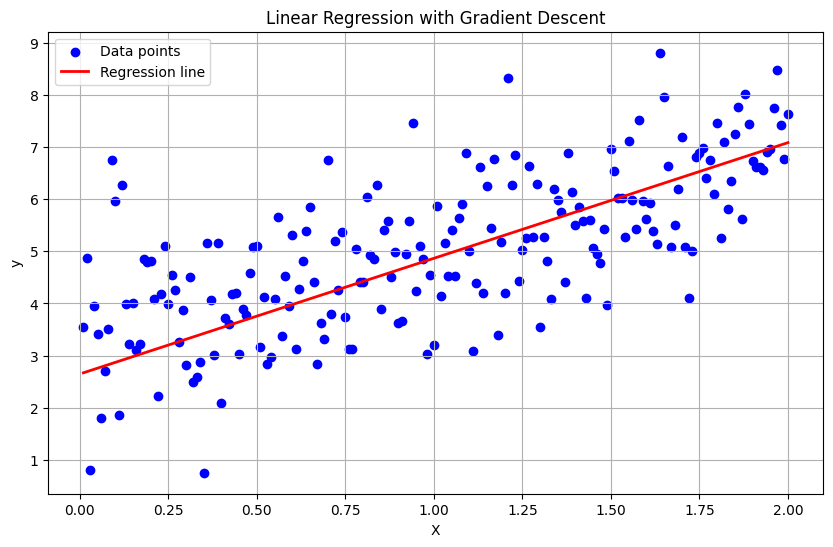

In [87]:
import numpy as np
import matplotlib.pyplot as plt

def gd_linear_regression(X, y, learning_rate=0.01, max_iters=100, update_intervals=5):
    X_bias = np.c_[np.ones(X.shape[0]), X]

    theta = np.random.randn(X_bias.shape[1], 1)

    update_step = max_iters // update_intervals

    errors = []

    for iter in range(max_iters):

        predictions = X_bias @ theta
  
        error = np.mean((predictions - y) ** 2)
        errors.append(error)
        gradient = (1/len(y)) * X_bias.T @ (predictions - y)

        theta -= learning_rate * gradient
        
        if (iter + 1) % update_step == 0:
            print(f"Iteration: {iter+1}, Learning Rate: {learning_rate:.6f}, " 
                  f"Theta: [θ0={theta[0,0]:.4f}, θ1={theta[1,0]:.4f}], "
                  f"Training Error: {error:.6f}")
            learning_rate *= 0.5  
    
    final_error = np.mean((X_bias @ theta - y) ** 2)
    print("\nFinal Results:")
    print(f"θ0 (Intercept): {theta[0,0]:.6f}")
    print(f"θ1 (Slope): {theta[1,0]:.6f}")
    print(f"Training Error (MSE): {final_error:.6f}")

    plot_regression(X, y, theta)
    
    return theta, errors

def plot_regression(X, y, theta):
 
    plt.figure(figsize=(10, 6))
    
    plt.scatter(X, y, color='blue', label='Data points')
    x_range = np.array([min(X), max(X)])
    y_pred = theta[0] + theta[1] * x_range
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression line')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with Gradient Descent')
    plt.legend()
    plt.grid(True)
    plt.show()


theta, errors = gd_linear_regression(X, y, learning_rate=0.01, max_iters=500, update_intervals=5)

Epoch: 1, Learning Rate: 0.010000, Theta: [θ0=2.2165, θ1=2.5373], Training Error: 1.425111
Epoch: 2, Learning Rate: 0.010000, Theta: [θ0=2.4998, θ1=2.3509], Training Error: 1.300415
Epoch: 3, Learning Rate: 0.010000, Theta: [θ0=2.6708, θ1=2.1658], Training Error: 1.246967
Epoch: 4, Learning Rate: 0.010000, Theta: [θ0=2.8655, θ1=2.1166], Training Error: 1.201745
Epoch: 5, Learning Rate: 0.010000, Theta: [θ0=2.9658, θ1=2.0480], Training Error: 1.186305

Final Results:
θ0 (Intercept): 2.965754
θ1 (Slope): 2.047985
Training Error (MSE): 1.186305


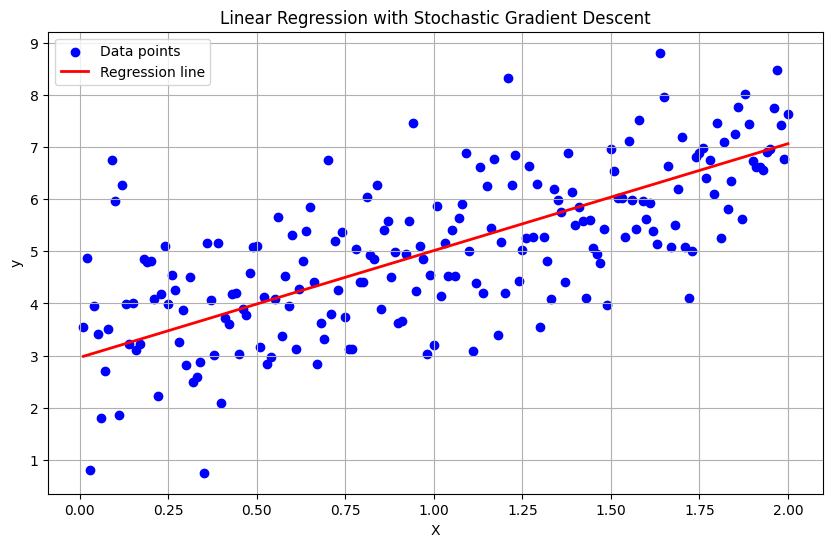

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def sgd_linear_regression(X, y, learning_rate=0.01, epochs=5):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    n_samples = X_bias.shape[0]
    theta = np.random.randn(X_bias.shape[1], 1)
    
    errors = []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]
        
        for i in range(n_samples):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i:i+1]
            prediction = xi @ theta

            gradient = xi.T @ (prediction - yi)
            theta -= learning_rate * gradient
        
        predictions = X_bias @ theta
        error = np.mean((predictions - y) ** 2)
        errors.append(error)

        print(f"Epoch: {epoch+1}, Learning Rate: {learning_rate:.6f}, "
              f"Theta: [θ0={theta[0,0]:.4f}, θ1={theta[1,0]:.4f}], "
              f"Training Error: {error:.6f}")

    final_error = np.mean((X_bias @ theta - y) ** 2)
    print("\nFinal Results:")
    print(f"θ0 (Intercept): {theta[0,0]:.6f}")
    print(f"θ1 (Slope): {theta[1,0]:.6f}")
    print(f"Training Error (MSE): {final_error:.6f}")
    
    plot_regression(X, y, theta)
    
    return theta, errors

def plot_regression(X, y, theta):

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    
    x_range = np.array([min(X), max(X)])
    y_pred = theta[0] + theta[1] * x_range
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression line')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression with Stochastic Gradient Descent')
    plt.legend()
    plt.grid(True)
    plt.show()

theta, errors = sgd_linear_regression(X, y, learning_rate=0.01, epochs=5)

# Q3


In [95]:
def load_data(file_path):
    """
    Loads a single-column data file and returns it as a NumPy array.
    """
    return np.genfromtxt(file_path, delimiter=',')
X = load_data("data/hw1_ridge_x.dat")
y = load_data("data/hw1_ridge_y.dat")

print(X.shape)
print(y.shape)

(50, 4)
(50,)


In [106]:
import numpy as np

def ridge_regression(X, y, lambda_):
    n_features = X.shape[1]
    I = np.eye(n_features)

    theta_ridge = np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y
    
    return theta_ridge


In [108]:
lambda_values = [0, 0.15]

for lambda_ in lambda_values:
    theta_ridge = ridge_regression(X, y, lambda_)
    print(f"Ridge regression solution for λ = {lambda_}:")
    print(theta_ridge)


Ridge regression solution for λ = 0:
[-0.57392068  1.35757059  0.01527565 -1.88288076]
Ridge regression solution for λ = 0.15:
[-0.57310624  1.35276417  0.01488462 -1.87644898]


In [116]:
vX = X[:10, :]  
vY = y[:10]     
tX = X[10:, :] 
tY = y[10:]   


print(f"Xtrain shape: {Xtrain.shape}")
print(f"ytrain shape: {ytrain.shape}")
print(f"Xval shape: {Xval.shape}")
print(f"yval shape: {yval.shape}")

Xtrain shape: (40, 4)
ytrain shape: (40,)
Xval shape: (10, 4)
yval shape: (10,)


In [117]:
import matplotlib.pyplot as plt
tn = Xt.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0, 5, 0.1)

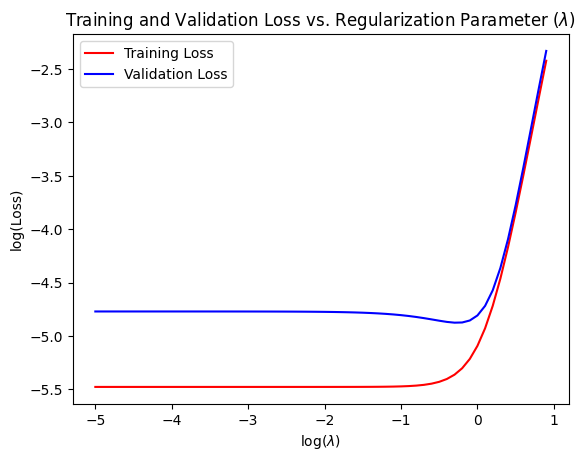

The value of λ that minimizes the validation loss: 0.501187233627253


In [119]:
import matplotlib.pyplot as plt
import numpy as np

tn = Xt.shape[0]  
vn = vX.shape[0]
tloss = []
vloss = []


index = np.arange(-5, 1, 0.1)

for i in index:

    w = ridge_regression(tX, tY, 10**i)
    tloss.append(np.sum((np.dot(tX, w) - tY)**2) / tn / 2)
    vloss.append(np.sum((np.dot(vX, w) - vY)**2) / vn / 2)

plt.plot(index, np.log(tloss), 'r', label='Training Loss')
plt.plot(index, np.log(vloss), 'b', label='Validation Loss')
plt.xlabel('log($\lambda$)')
plt.ylabel('log(Loss)')
plt.legend()
plt.title('Training and Validation Loss vs. Regularization Parameter ($\lambda$)')
plt.show()

min_vloss_idx = np.argmin(vloss)  
optimal_lambda = 10**index[min_vloss_idx] 

print(f"The value of λ that minimizes the validation loss: {optimal_lambda}")
